## Brayan's Notebook

This notebook is Brayan's exploration on comparing observations from space of Near Earth Objects (NEOs), specifically Potentially Hazardous Asteroids (PHAs), to what we observe on Earth

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Cleaning Process

In [2]:
#import NEO data
NEO_df= pd.read_csv('../raw/NEO_sample.csv')
NEO_df

neo pha  diameter         GM       e      a   first_obs
0         N   N   939.400  62.628400  0.0796  2.766  1995-01-05
1         N   N   513.000  13.630000  0.2306  2.770  1804-08-27
2         N   N   246.596        NaN  0.2558  2.671  1804-10-17
3         N   N   522.770  17.288284  0.0902  2.362  1950-09-23
4         N   N   106.699        NaN  0.1875  2.577  1845-12-15
...      ..  ..       ...        ...     ...    ...         ...
1481722   N   N       NaN        NaN  0.2498  2.425  1960-09-24
1481723   N   N       NaN        NaN  0.2827  2.336  1960-09-24
1481724   Y   Y       NaN        NaN  0.6617  2.821  1960-09-24
1481725   N   N       NaN        NaN  0.1297  2.359  2015-01-23
1481726   N   N       NaN        NaN  0.1492  2.717  2015-01-18

[1481727 rows x 7 columns]

Select only potentially hazardous asteroids (PHAs) $\rightarrow$ where `pha` column is 'Y' (for yes)

In [3]:
PHA_df=NEO_df[NEO_df['pha']=='Y'] # Selecting only Potentially Hazardous Asteroids (PHAs)
PHA_df

neo pha  diameter  GM       e      a   first_obs
1565      Y   Y      1.00 NaN  0.8270  1.078  1949-07-01
1619      Y   Y      2.56 NaN  0.3355  1.246  1951-09-14
1861      Y   Y      1.50 NaN  0.5599  1.471  1930-12-13
1980      Y   Y      3.40 NaN  0.6505  1.776  1973-03-06
2100      Y   Y      0.60 NaN  0.7641  1.874  1936-02-21
...      ..  ..       ...  ..     ...    ...         ...
1481457   Y   Y       NaN NaN  0.5960  1.439  2025-11-25
1481567   Y   Y       NaN NaN  0.3481  1.499  2025-11-29
1481612   Y   Y       NaN NaN  0.6012  2.434  2025-11-26
1481719   Y   Y       NaN NaN  0.8307  2.487  2025-12-07
1481724   Y   Y       NaN NaN  0.6617  2.821  1960-09-24

[2523 rows x 7 columns]

Search for any missing data

In [4]:
PHA_df.isnull().sum() #NaN counts for each column

neo             0
pha             0
diameter     2184
GM           2519
e               0
a               0
first_obs       0
dtype: int64

Most of the datapoints have a NaN for the diameter and even more for the mass (GM), therefore, these may not be the best parameters to use in our analysis

# Exploring the NEO dataset with Meteorite Landings dataset

In [5]:
meteor_df= pd.read_csv("../raw/Meteorite_Landings.csv")
meteor_df

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[45716 rows x 10 columns]

In [7]:
PHA_df['year'] = pd.to_datetime(PHA_df['first_obs'], errors='coerce').dt.year

meteor_yearly = meteor_df.groupby('year').size().reset_index(name='meteorite_count')
PHA_yearly = PHA_df.groupby('year').size().reset_index(name='neo_count')

/tmp/ipykernel_13260/2491655811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PHA_df['year'] = pd.to_datetime(PHA_df['first_obs'], errors='coerce').dt.year


In [8]:
merged = pd.merge(meteor_yearly, PHA_yearly, on='year', how='inner')

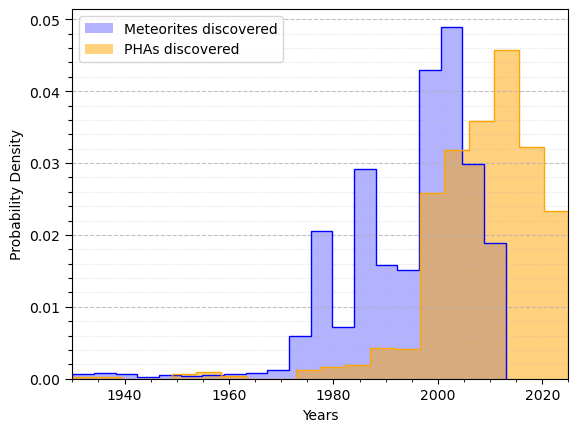

In [61]:
plt.hist(meteor_df[(meteor_df['year'] >= PHA_df['year'].min()) & (meteor_df['year'] <= 2025)]['year'], density=True, alpha=0.3, bins=20, label='Meteorites discovered', color='blue')
plt.hist(meteor_df[(meteor_df['year'] >= PHA_df['year'].min()) & (meteor_df['year'] <= 2025)]['year'], density=True, alpha=1, bins=20, histtype='step', color='blue')

plt.hist(PHA_df['year'], density=True, alpha=0.5, bins=20, label="PHAs discovered", color='orange')
plt.hist(PHA_df['year'], density=True, alpha=1, bins=20, color='orange', histtype='step')


plt.xlim(PHA_df['year'].min(), PHA_df['year'].max())
plt.xlabel('Years')
plt.ylabel('Probability Density')

# Make major ticks bigger
plt.tick_params(axis='y', which='major', length=5)

# Make minor ticks smaller
plt.minorticks_on()
plt.tick_params(axis='y', which='minor', length=3, width=0.8, direction='out')

plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.grid(axis='y', which='minor', linestyle=':', alpha=0.4)


plt.legend()
plt.show()

In [10]:
merged[['meteorite_count', 'neo_count']].corr(method='pearson')

meteorite_count  neo_count
meteorite_count         1.000000   0.476224
neo_count               0.476224   1.000000

In [11]:
merged[['meteorite_count', 'neo_count']].corr(method='spearman')

meteorite_count  neo_count
meteorite_count         1.000000   0.645975
neo_count               0.645975   1.000000

### Comparing Masses

Meteorite Median: 1.513217600067939
Meteorite Mean: -inf
True
PHA median: 14.259106984834144
PHA mean: 14.17514415742554


/home/hernab6/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


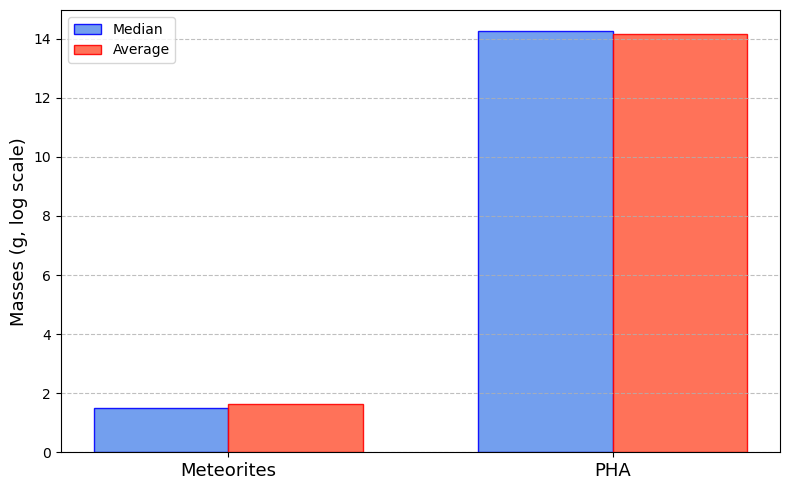

In [29]:
G=6.67*10**(-20) #G in NEO catalog is km^3/kg*s
meteor_logmass= np.log10(meteor_df['mass (g)'])
PHA_logmass= np.log10(PHA_df['GM']/G *1000) # Masses in NEO sample are Gravitational Mass (GM) so it is the mass (M) multiplied with the gravitaional constant (G), divided by 1000 to convert from kg to g
PHA_logmass = PHA_logmass.dropna()
print("Meteorite Median:", meteor_logmass.median())
print("Meteorite Mean:",meteor_logmass.mean())

#Cleaned up some logmasses that became -inf
print(meteor_logmass.isin([float('inf'), float('-inf')]).any()) #checks if any inf or -inf
meteor_logmass.replace([np.inf, -np.inf], np.nan, inplace=True)

print("PHA median:", PHA_logmass.median()) # Masses in NEO sample are Gravitational Mass (GM) so it is the mass (M) multiplied with the gravitaional constant (G)
print("PHA mean:",PHA_logmass.mean())

cat= ['Meteorites', 'PHAs']
medians= [[meteor_logmass.mean(), meteor_logmass.median], [PHA_logmass.mean(), PHA_logmass.median]]


# Your data
cat= ['Meteorites', 'PHA']
medians = [meteor_logmass.median(), PHA_logmass.median()]
averages = [meteor_logmass.mean(), PHA_logmass.mean()]

# X positions
x = np.arange(len(cat))
width = 0.35  # width of each bar

plt.figure(figsize=(8, 5))

# Bars
plt.bar(x - width/2, medians, width, label='Median', color="cornflowerblue", alpha=0.9, edgecolor='blue')
plt.bar(x + width/2, averages, width, label='Average', color="tomato", alpha=0.9,edgecolor='red')

plt.grid(axis='y', linestyle='--', alpha=0.8)

# Labels and title
plt.xticks(x, cat, fontsize=13)
plt.ylabel(r'Masses (g, log scale)', fontsize=13)
plt.legend()

plt.tight_layout()
plt.show()


# Plotting Map of Meteorite Landings

### Cleaning Meteorite Landing Datasaet

In [62]:
meteor_df.isnull().sum() #NaN counts for each column

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [63]:
#Omit data points that don't have any spacial datapoints, which is why reclat, reclong, and GeoLocation all have the same number of NaNs
clean_meteor_df = meteor_df.dropna(subset=["reclat"])
clean_meteor_df

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[38401 rows x 10 columns]

1


(array([7.0800e+02, 2.8570e+03, 1.6800e+02, 1.5929e+04, 5.9320e+03,
        8.3700e+02, 1.1969e+04, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-165.43333 , -113.442664,  -61.451998,   -9.461332,   42.529334,
          94.52    ,  146.510666,  198.501332,  250.491998,  302.482664,
         354.47333 ]),
 <BarContainer object of 10 artists>)

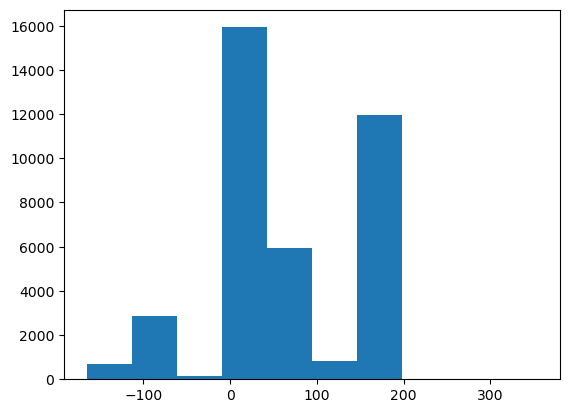

In [64]:
#Cleaning Meteorite dataset

#Meteorite Dataset should have Lat between -90 to 90 and longitude between -180 and 180
print(len(clean_meteor_df[(clean_meteor_df['reclong'] < -180) | (clean_meteor_df['reclong'] > 180)]))


plt.hist(clean_meteor_df['reclong'])

In [65]:
#removing that data point with long above 180
clean_meteor_df= clean_meteor_df[(clean_meteor_df['reclong'] >= -180) & (clean_meteor_df['reclong'] <= 180)]
clean_meteor_df

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[38400 rows x 10 columns]

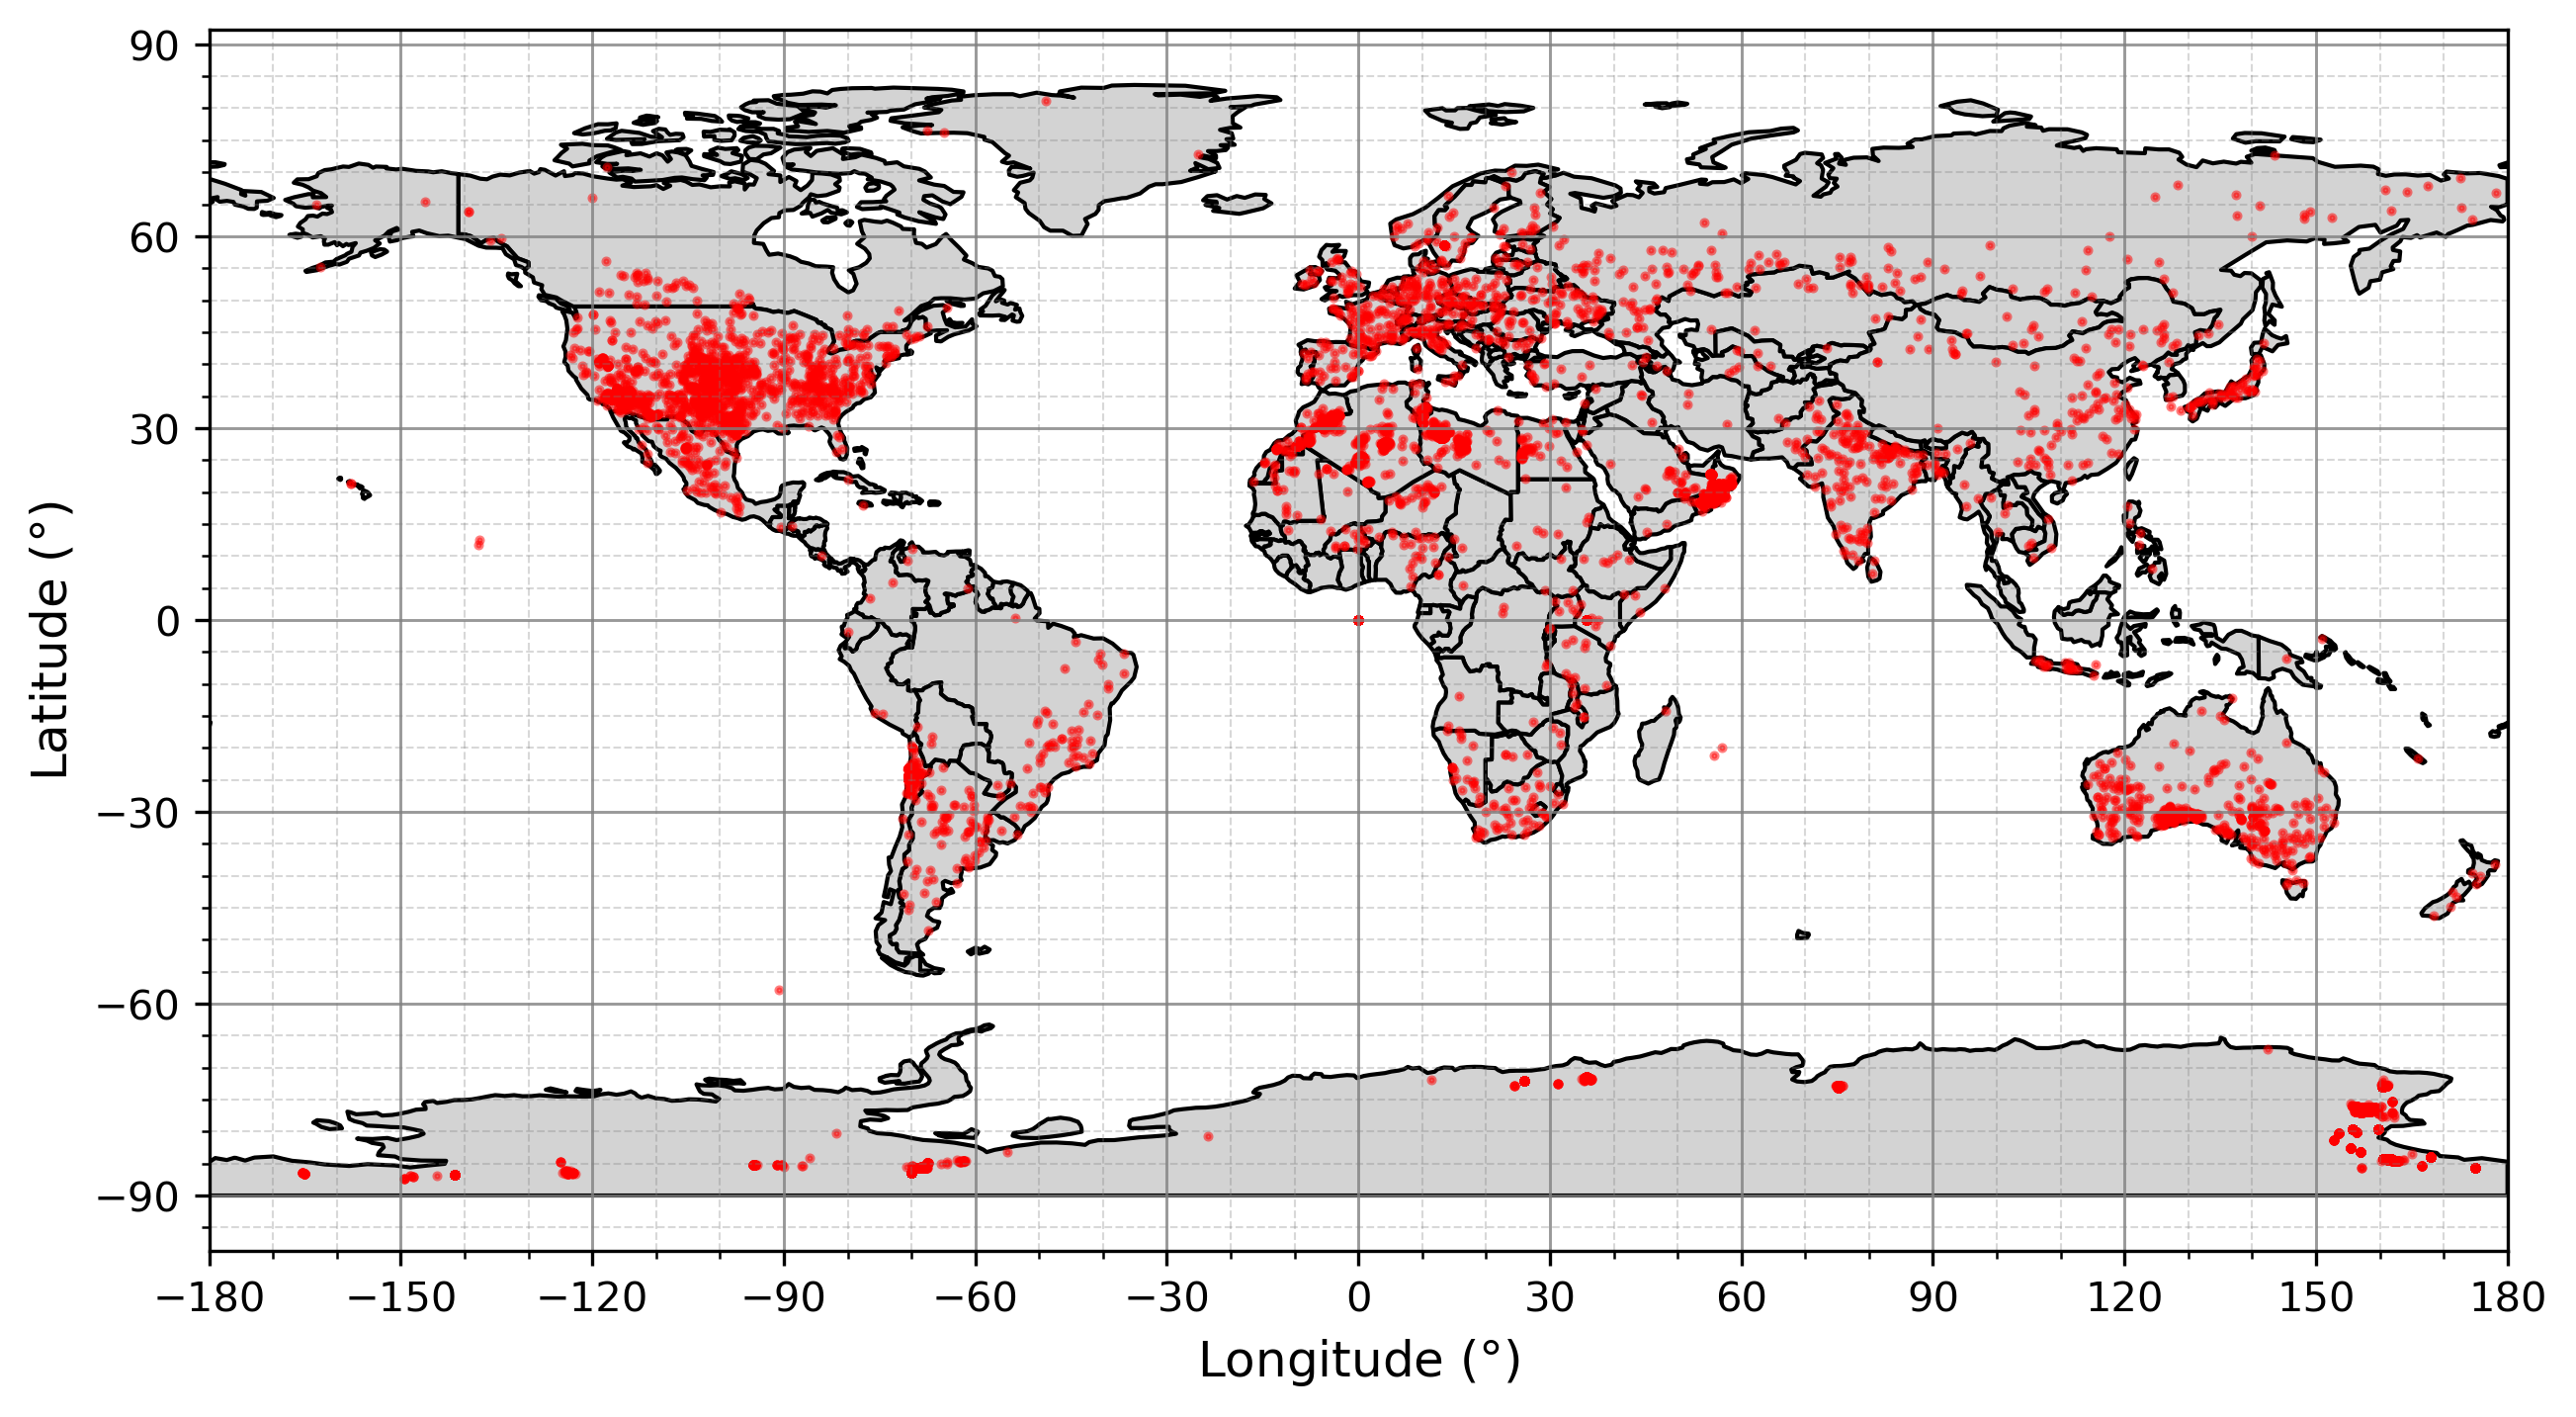

In [66]:
import geopandas as gpd
import geodatasets
from matplotlib.ticker import MultipleLocator

# Load world map
world = gpd.read_file("../raw/ne_110m_admin_0_countries.zip")



# Convert points to GeoDataFrame
points = gpd.GeoDataFrame(
    clean_meteor_df,
    geometry=gpd.points_from_xy(clean_meteor_df['reclong'], clean_meteor_df['reclat']),
    crs="EPSG:4326"   # WGS84 lat/lon
)

# Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-180, 181, 30))  # every 30° longitude
ax.set_yticks(range(-90, 91, 30))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(10))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(5))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlim(-180,180)
plt.show()

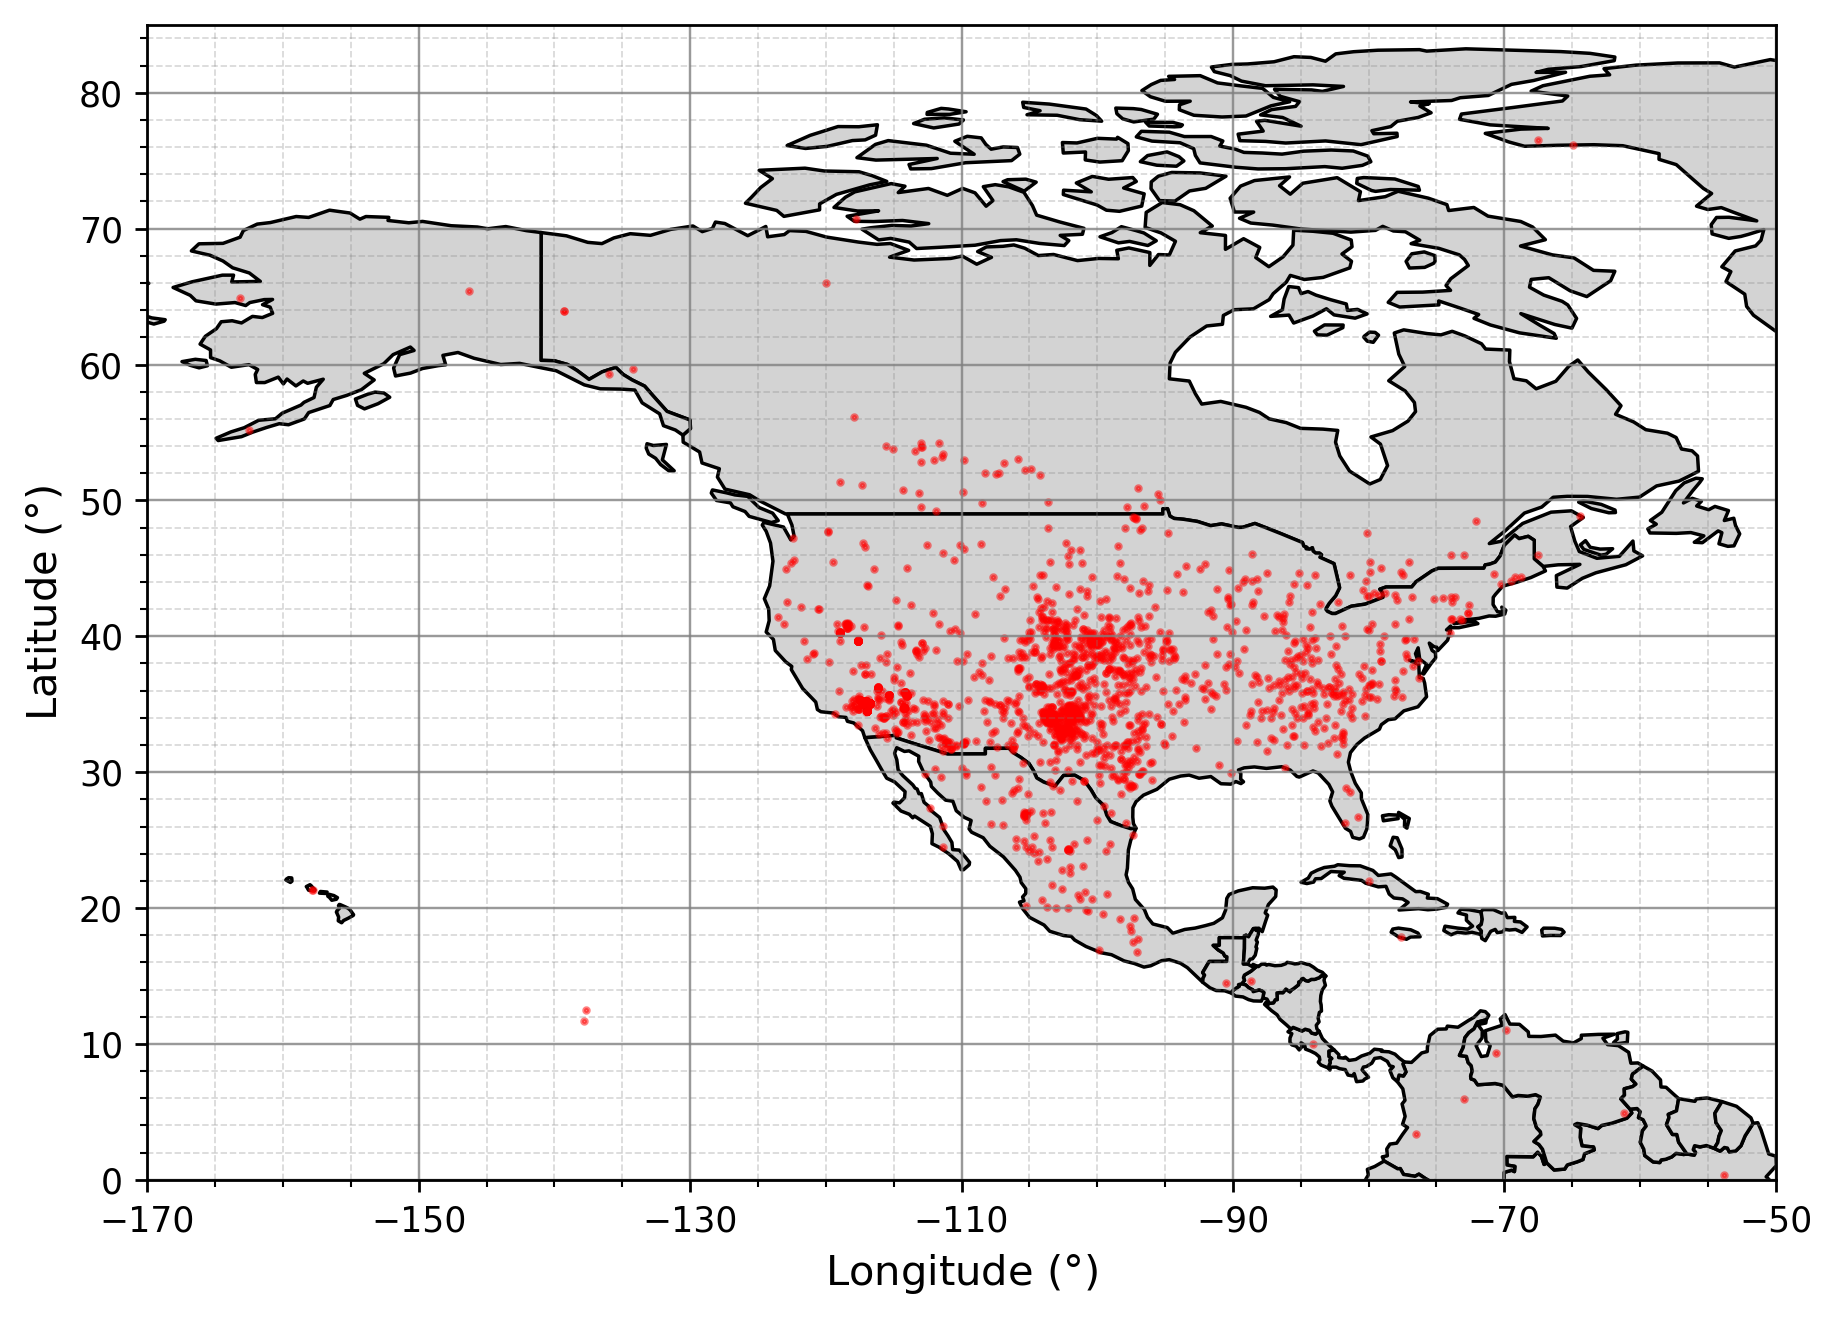

In [67]:
#Zoom into North America

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for North America
plt.xlim(-170, -50)
plt.ylim(5, 85)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-170, -40, 20))  # every 30° longitude
ax.set_yticks(range(0, 90, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

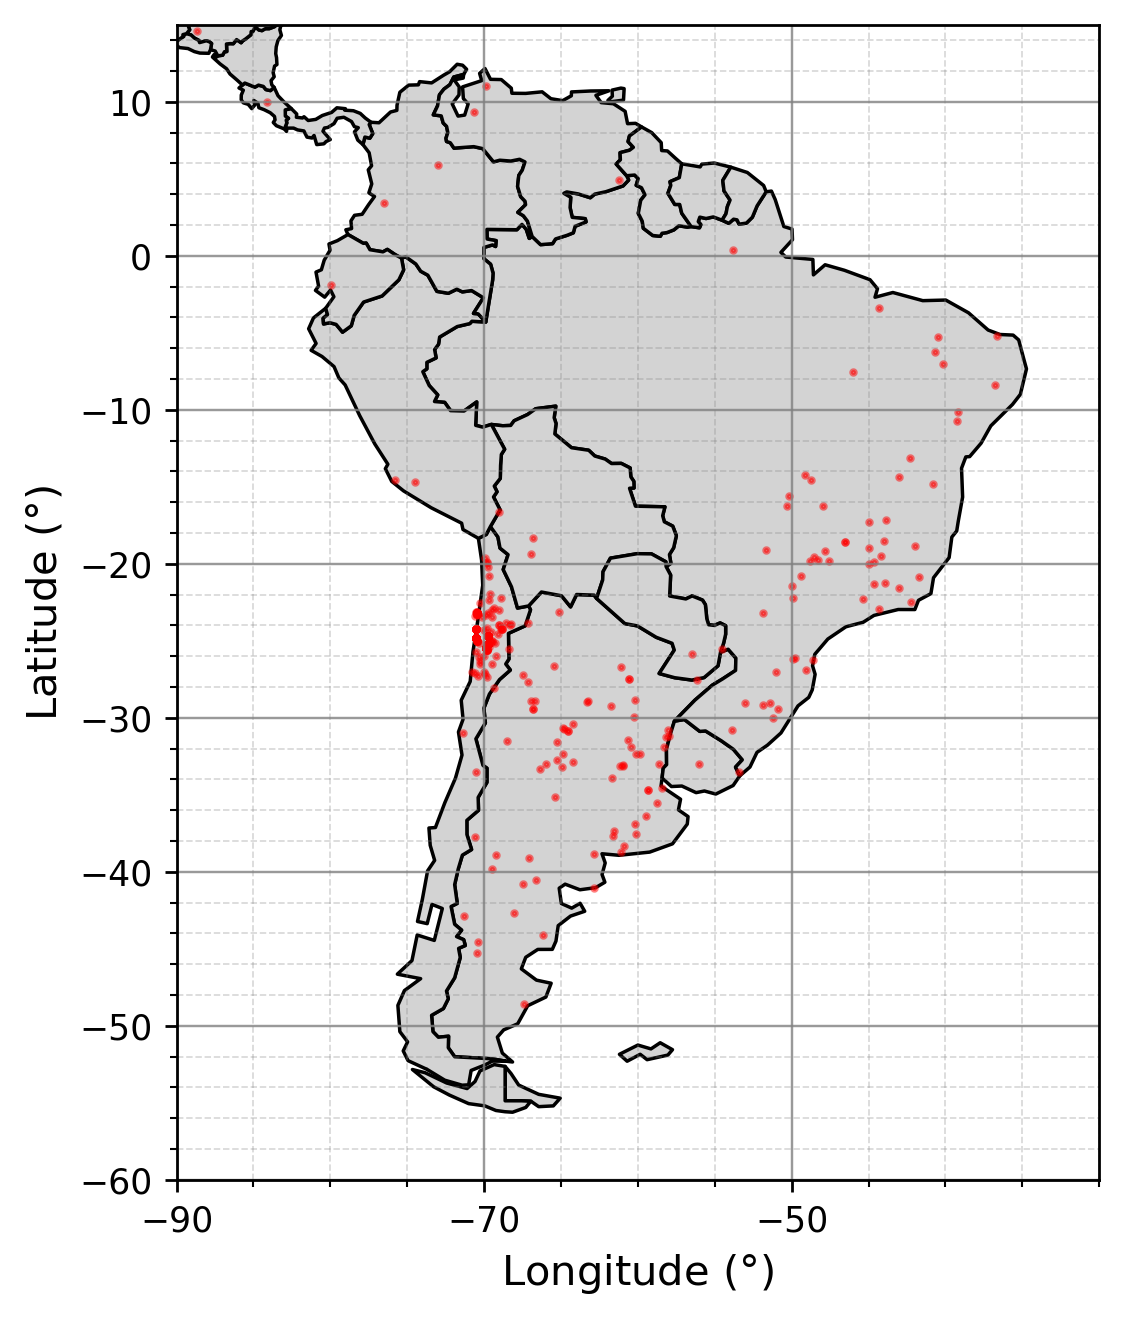

In [68]:
#Zoom into South America

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for North America
plt.xlim(-90, -30)
plt.ylim(-50, 15)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-90, -30, 20))  # every 30° longitude
ax.set_yticks(range(-60, 20, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

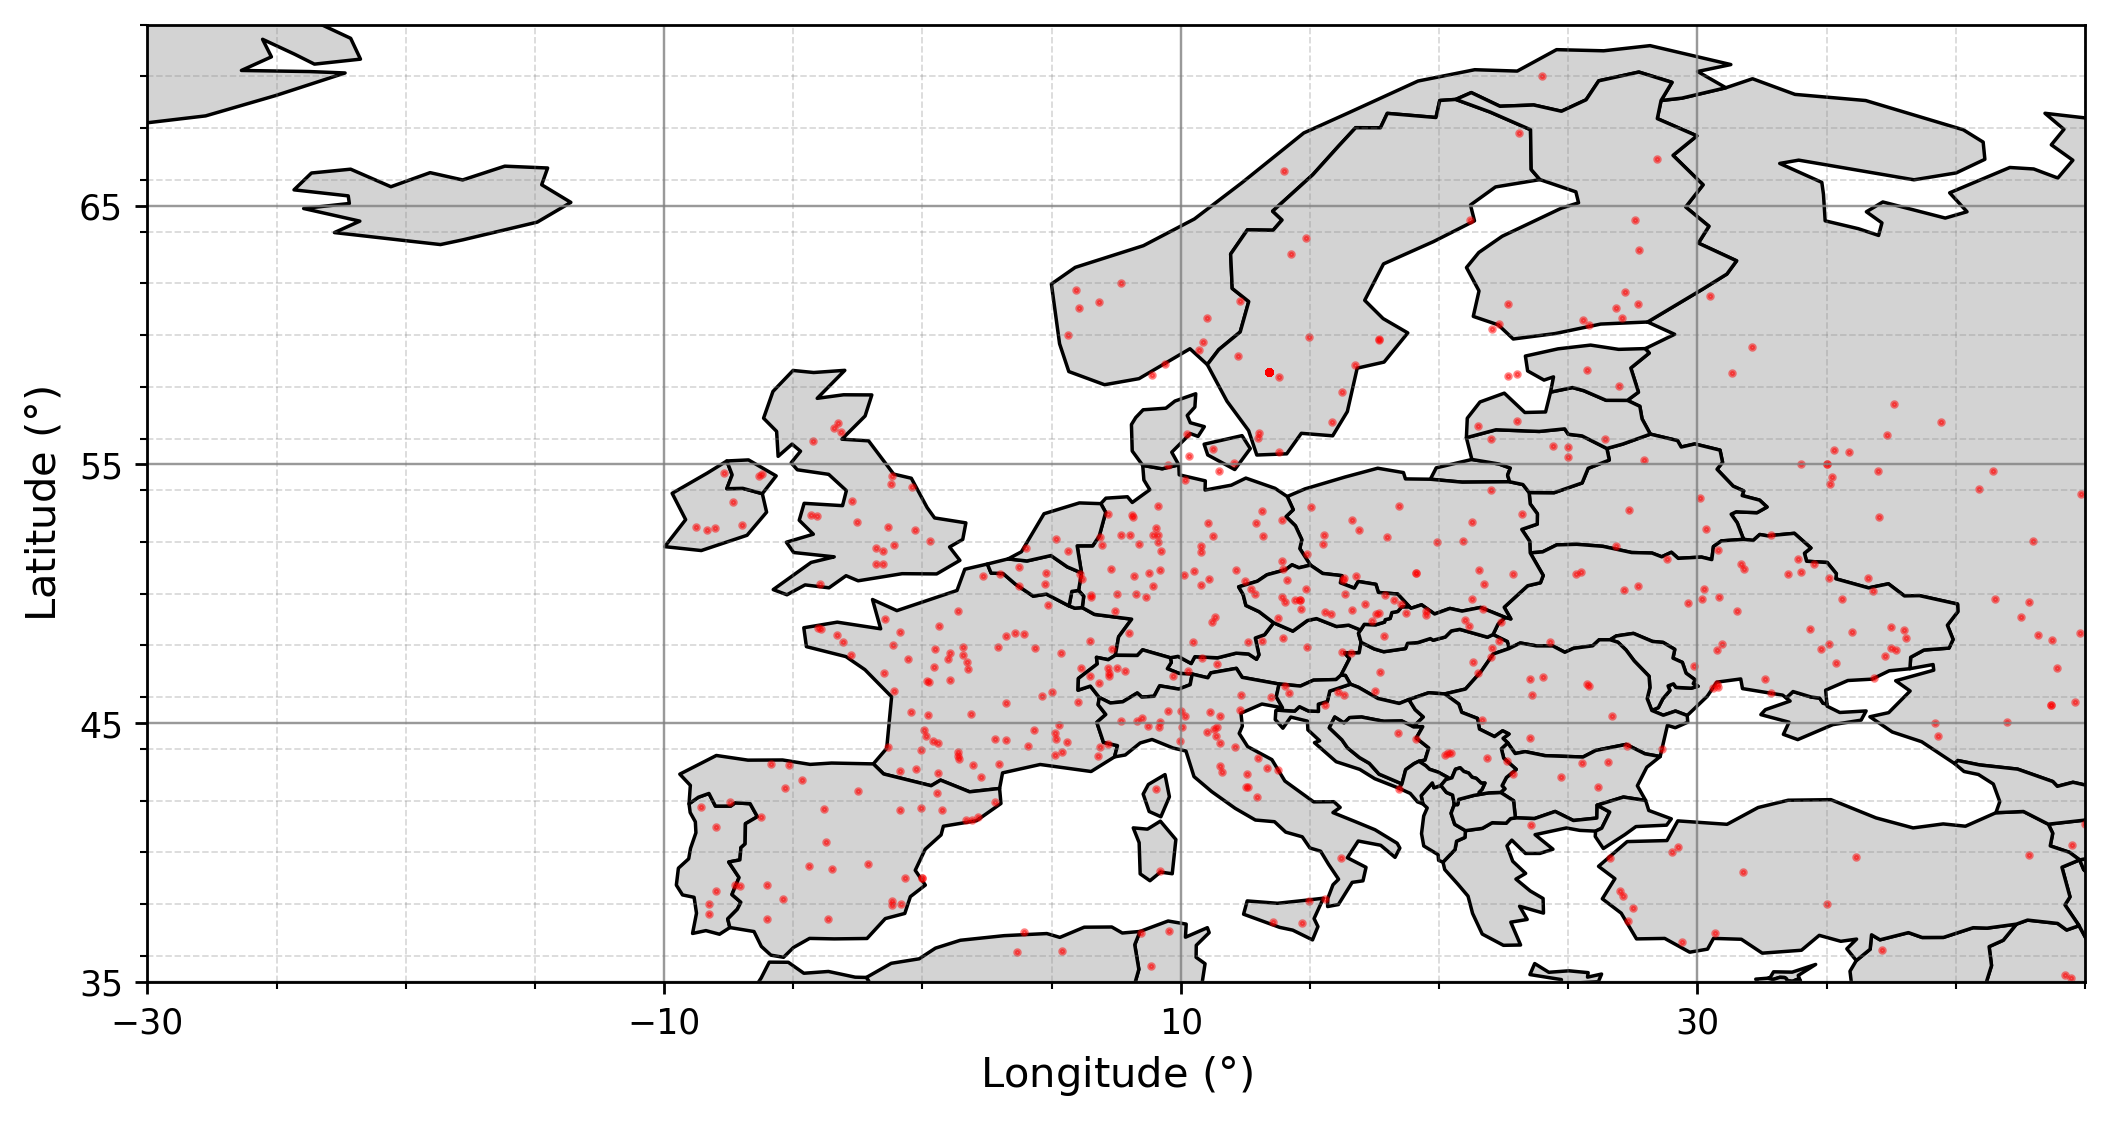

In [73]:
#Zoom into Europe


fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for North America
plt.xlim(-25, 45)
plt.ylim(35, 72)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-30, 50, 20))  # every 30° longitude
ax.set_yticks(range(35, 72, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

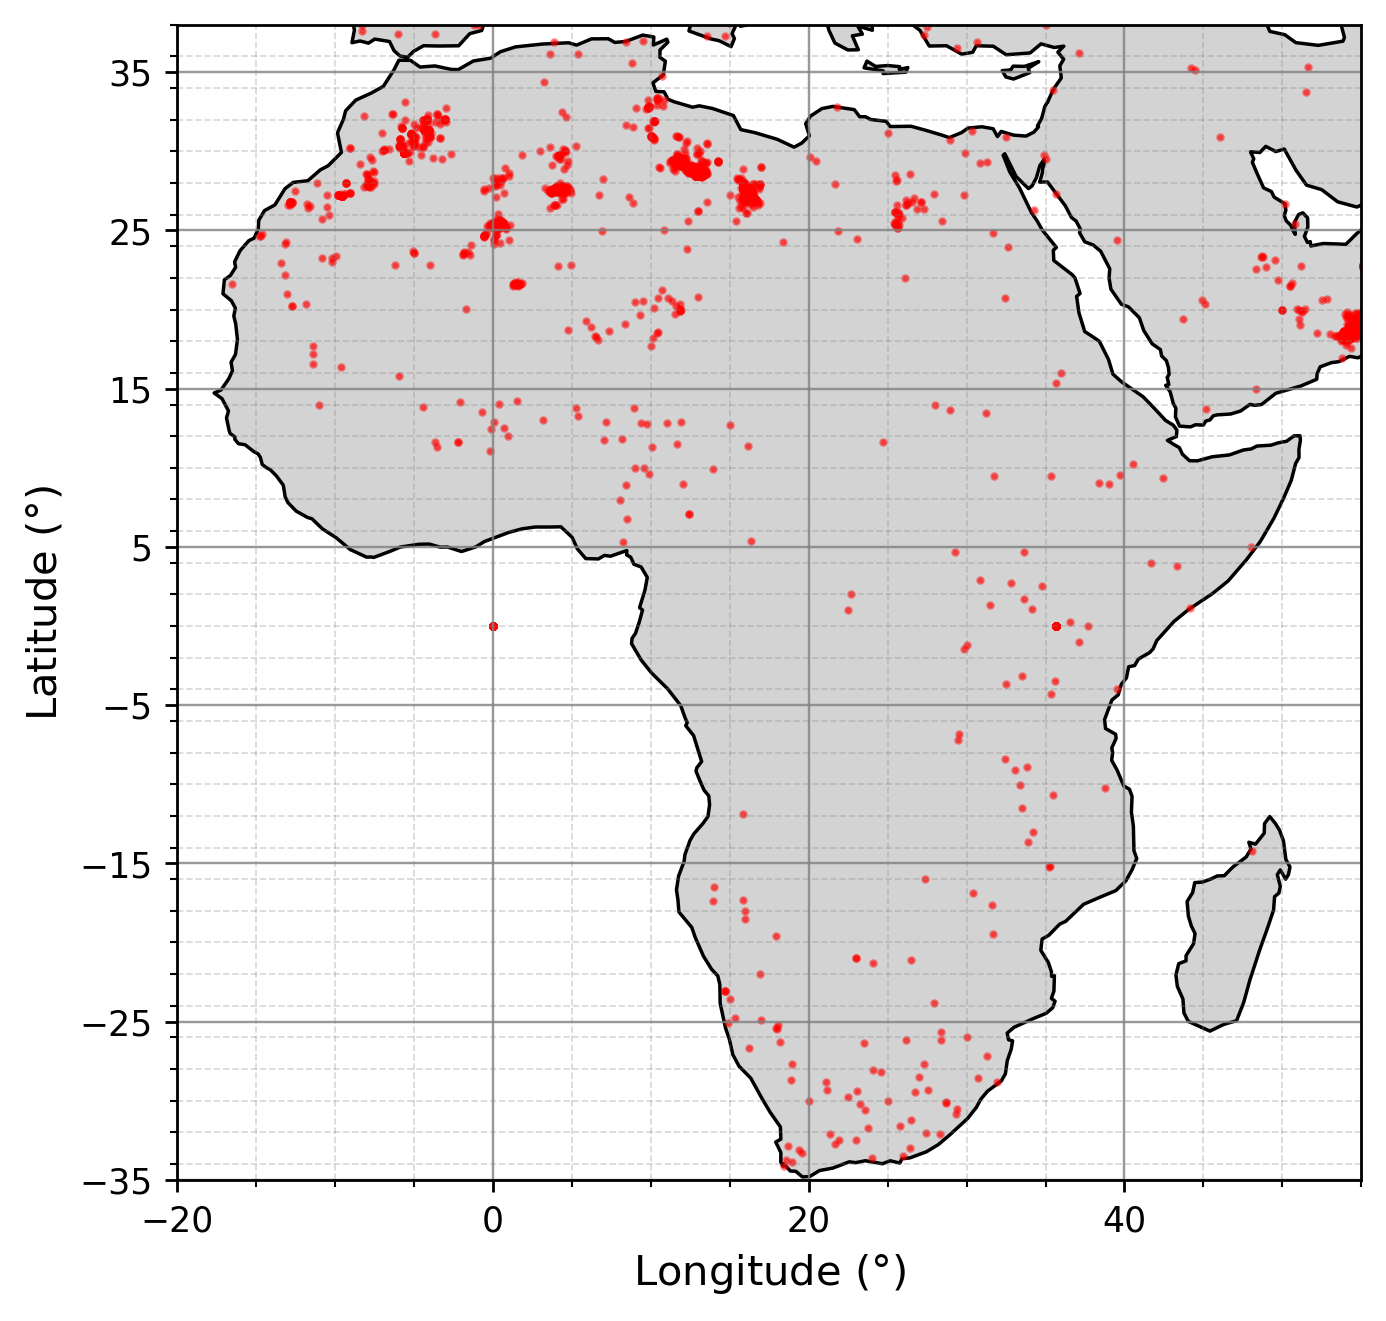

In [257]:
#Zoom into Africa

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for North America
plt.xlim(-20, 55)
plt.ylim(-35, 38)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-20, 55, 20))  # every 30° longitude
ax.set_yticks(range(-35, 38, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

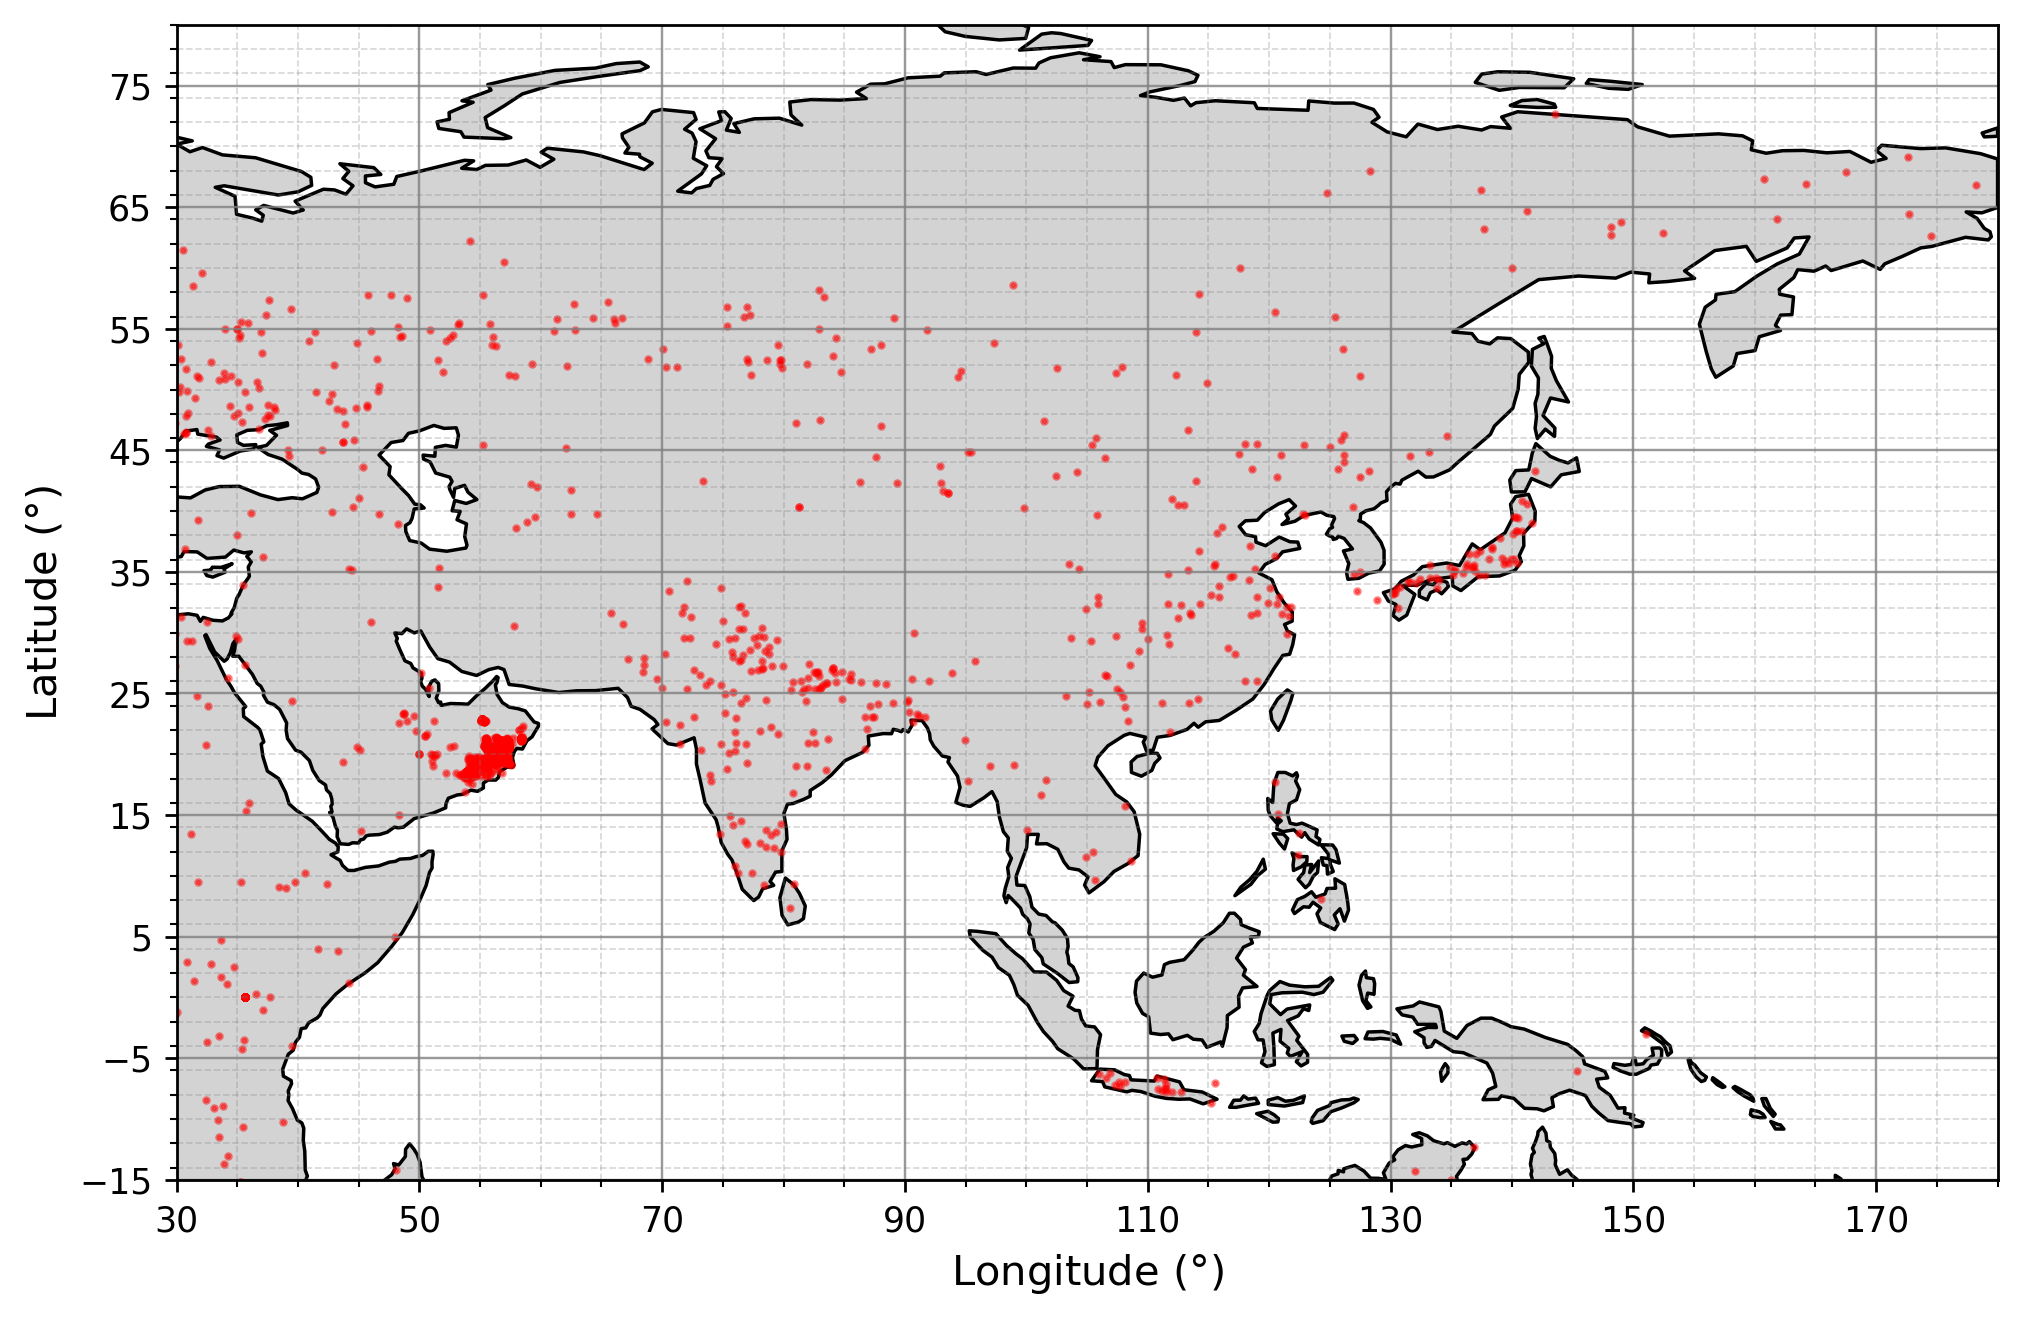

In [258]:
#Zoom into Asia

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for Asia
plt.xlim(30, 180)
plt.ylim(-15, 80)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(30, 180, 20))  # every 30° longitude
ax.set_yticks(range(-15, 80, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

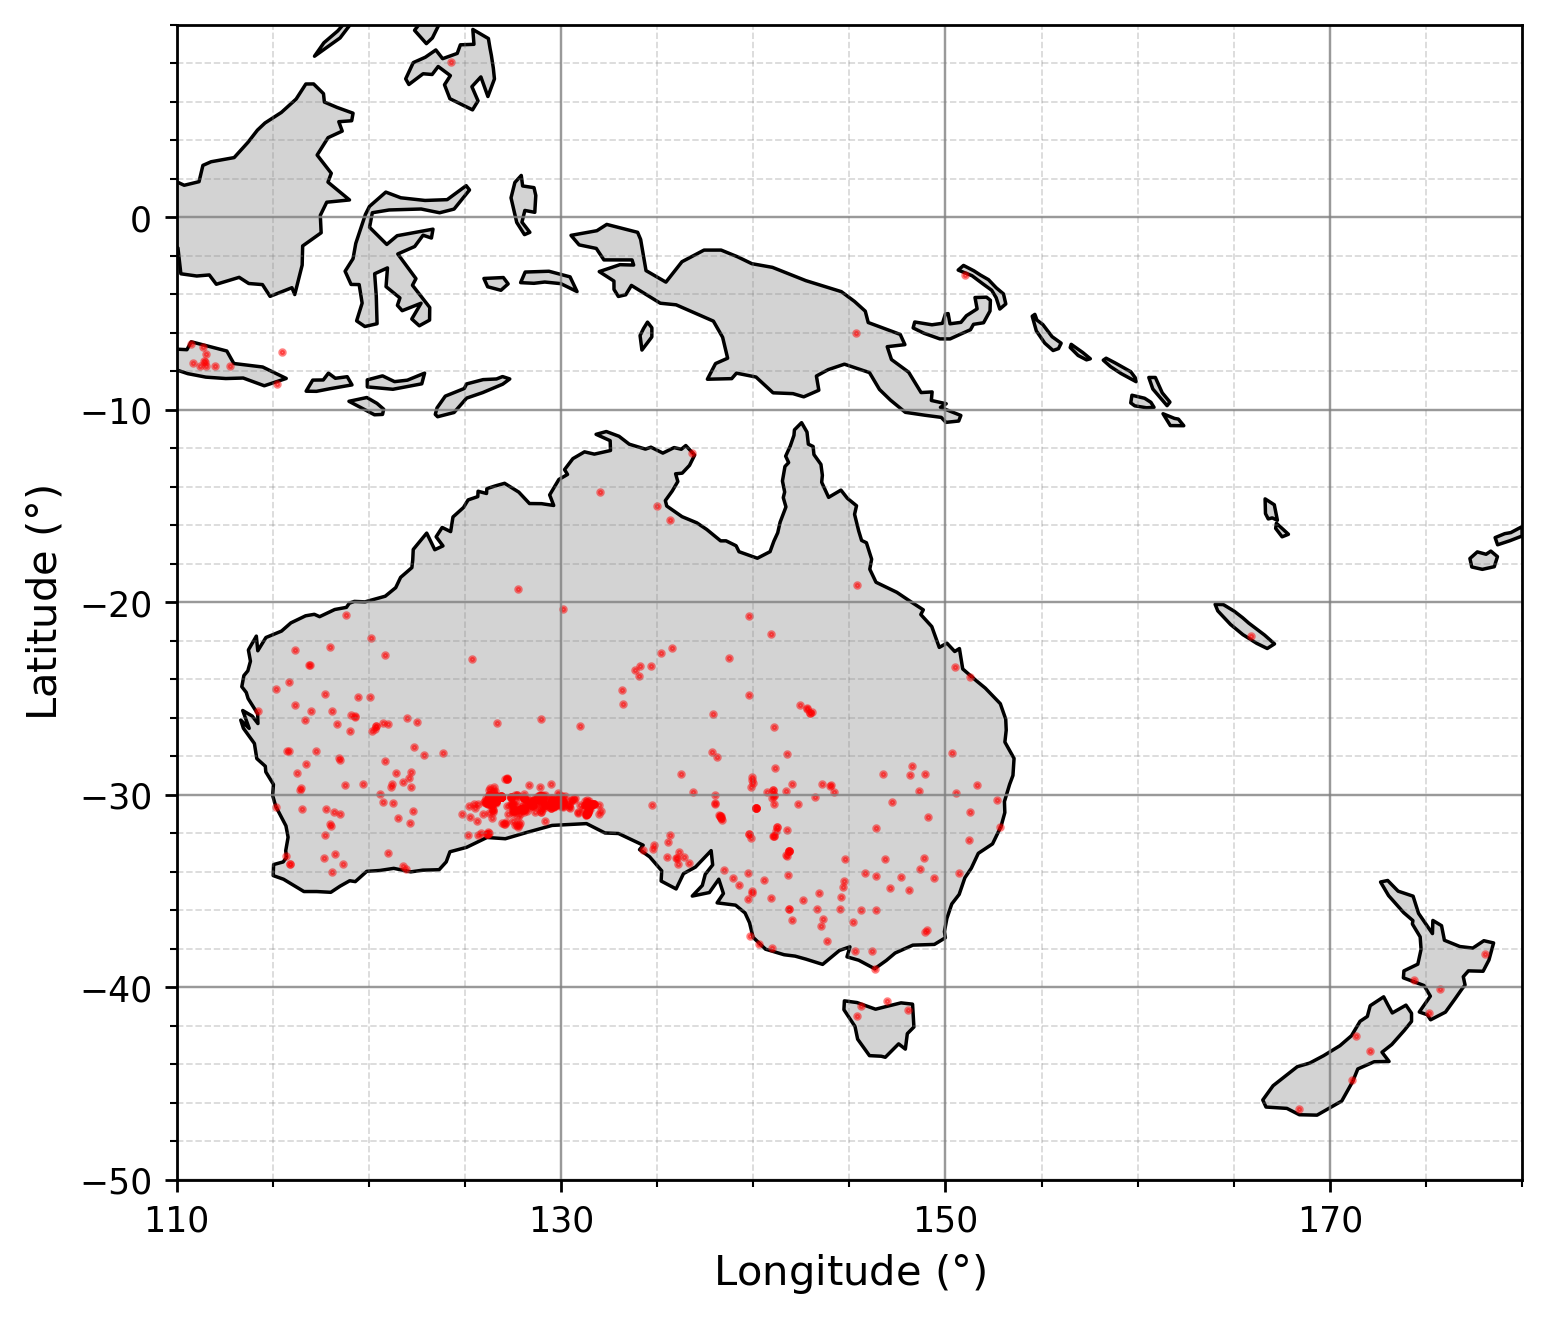

In [259]:
#Zoom into Australia

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for Asia
plt.xlim(110, 180)
plt.ylim(-50, 10)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(110, 180, 20))  # every 30° longitude
ax.set_yticks(range(-50, 10, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

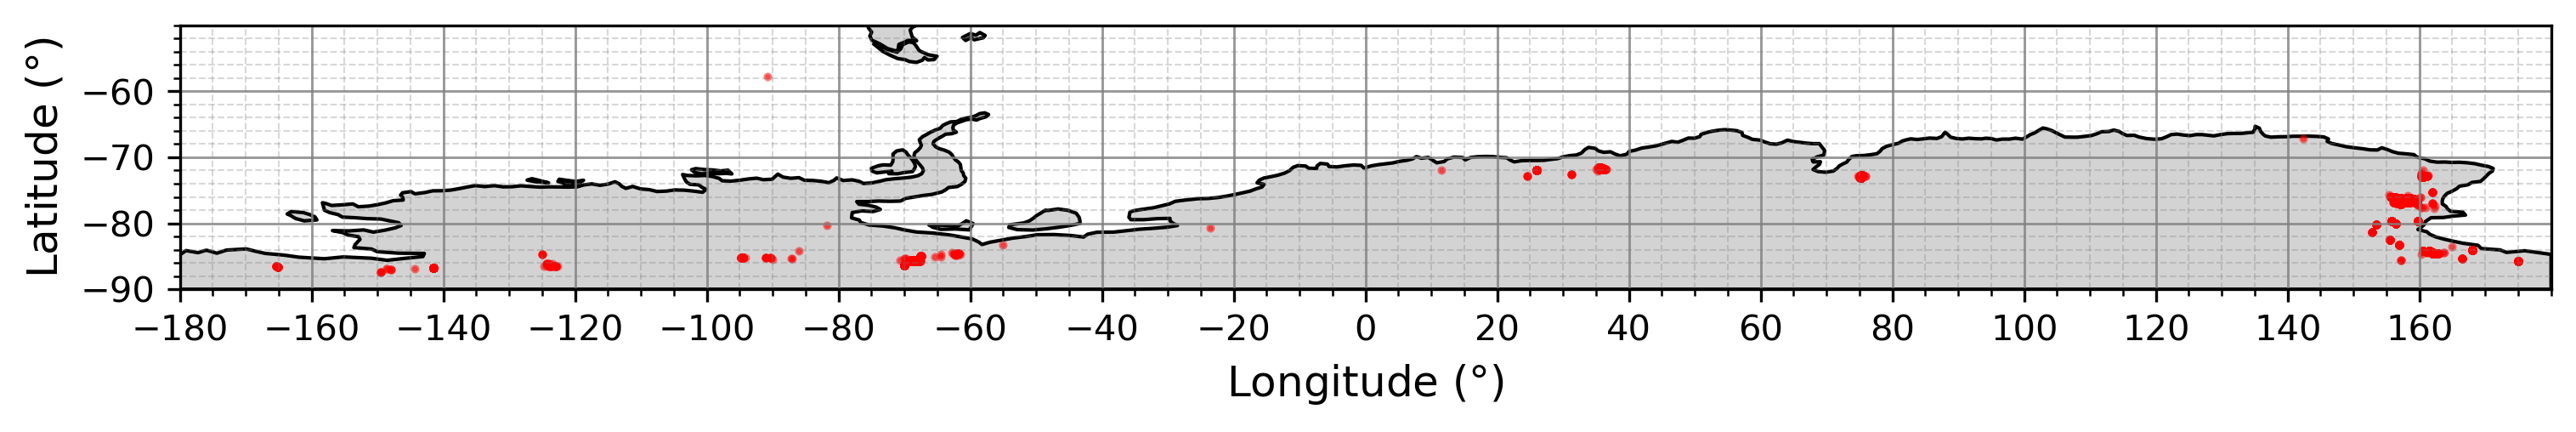

In [163]:
#Zoom into Antartica

fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
world.plot(ax=ax, color='lightgray', edgecolor='black')
points.plot(ax=ax, color='red', markersize=2, alpha=0.5)

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for Asia
plt.xlim(-180, 180)
plt.ylim(-90, -50)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-180, 180, 20))  # every 30° longitude
ax.set_yticks(range(-90, -50, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

### Explore Differences between meteorites that have fell and meteorites that were found (fell vs. found)

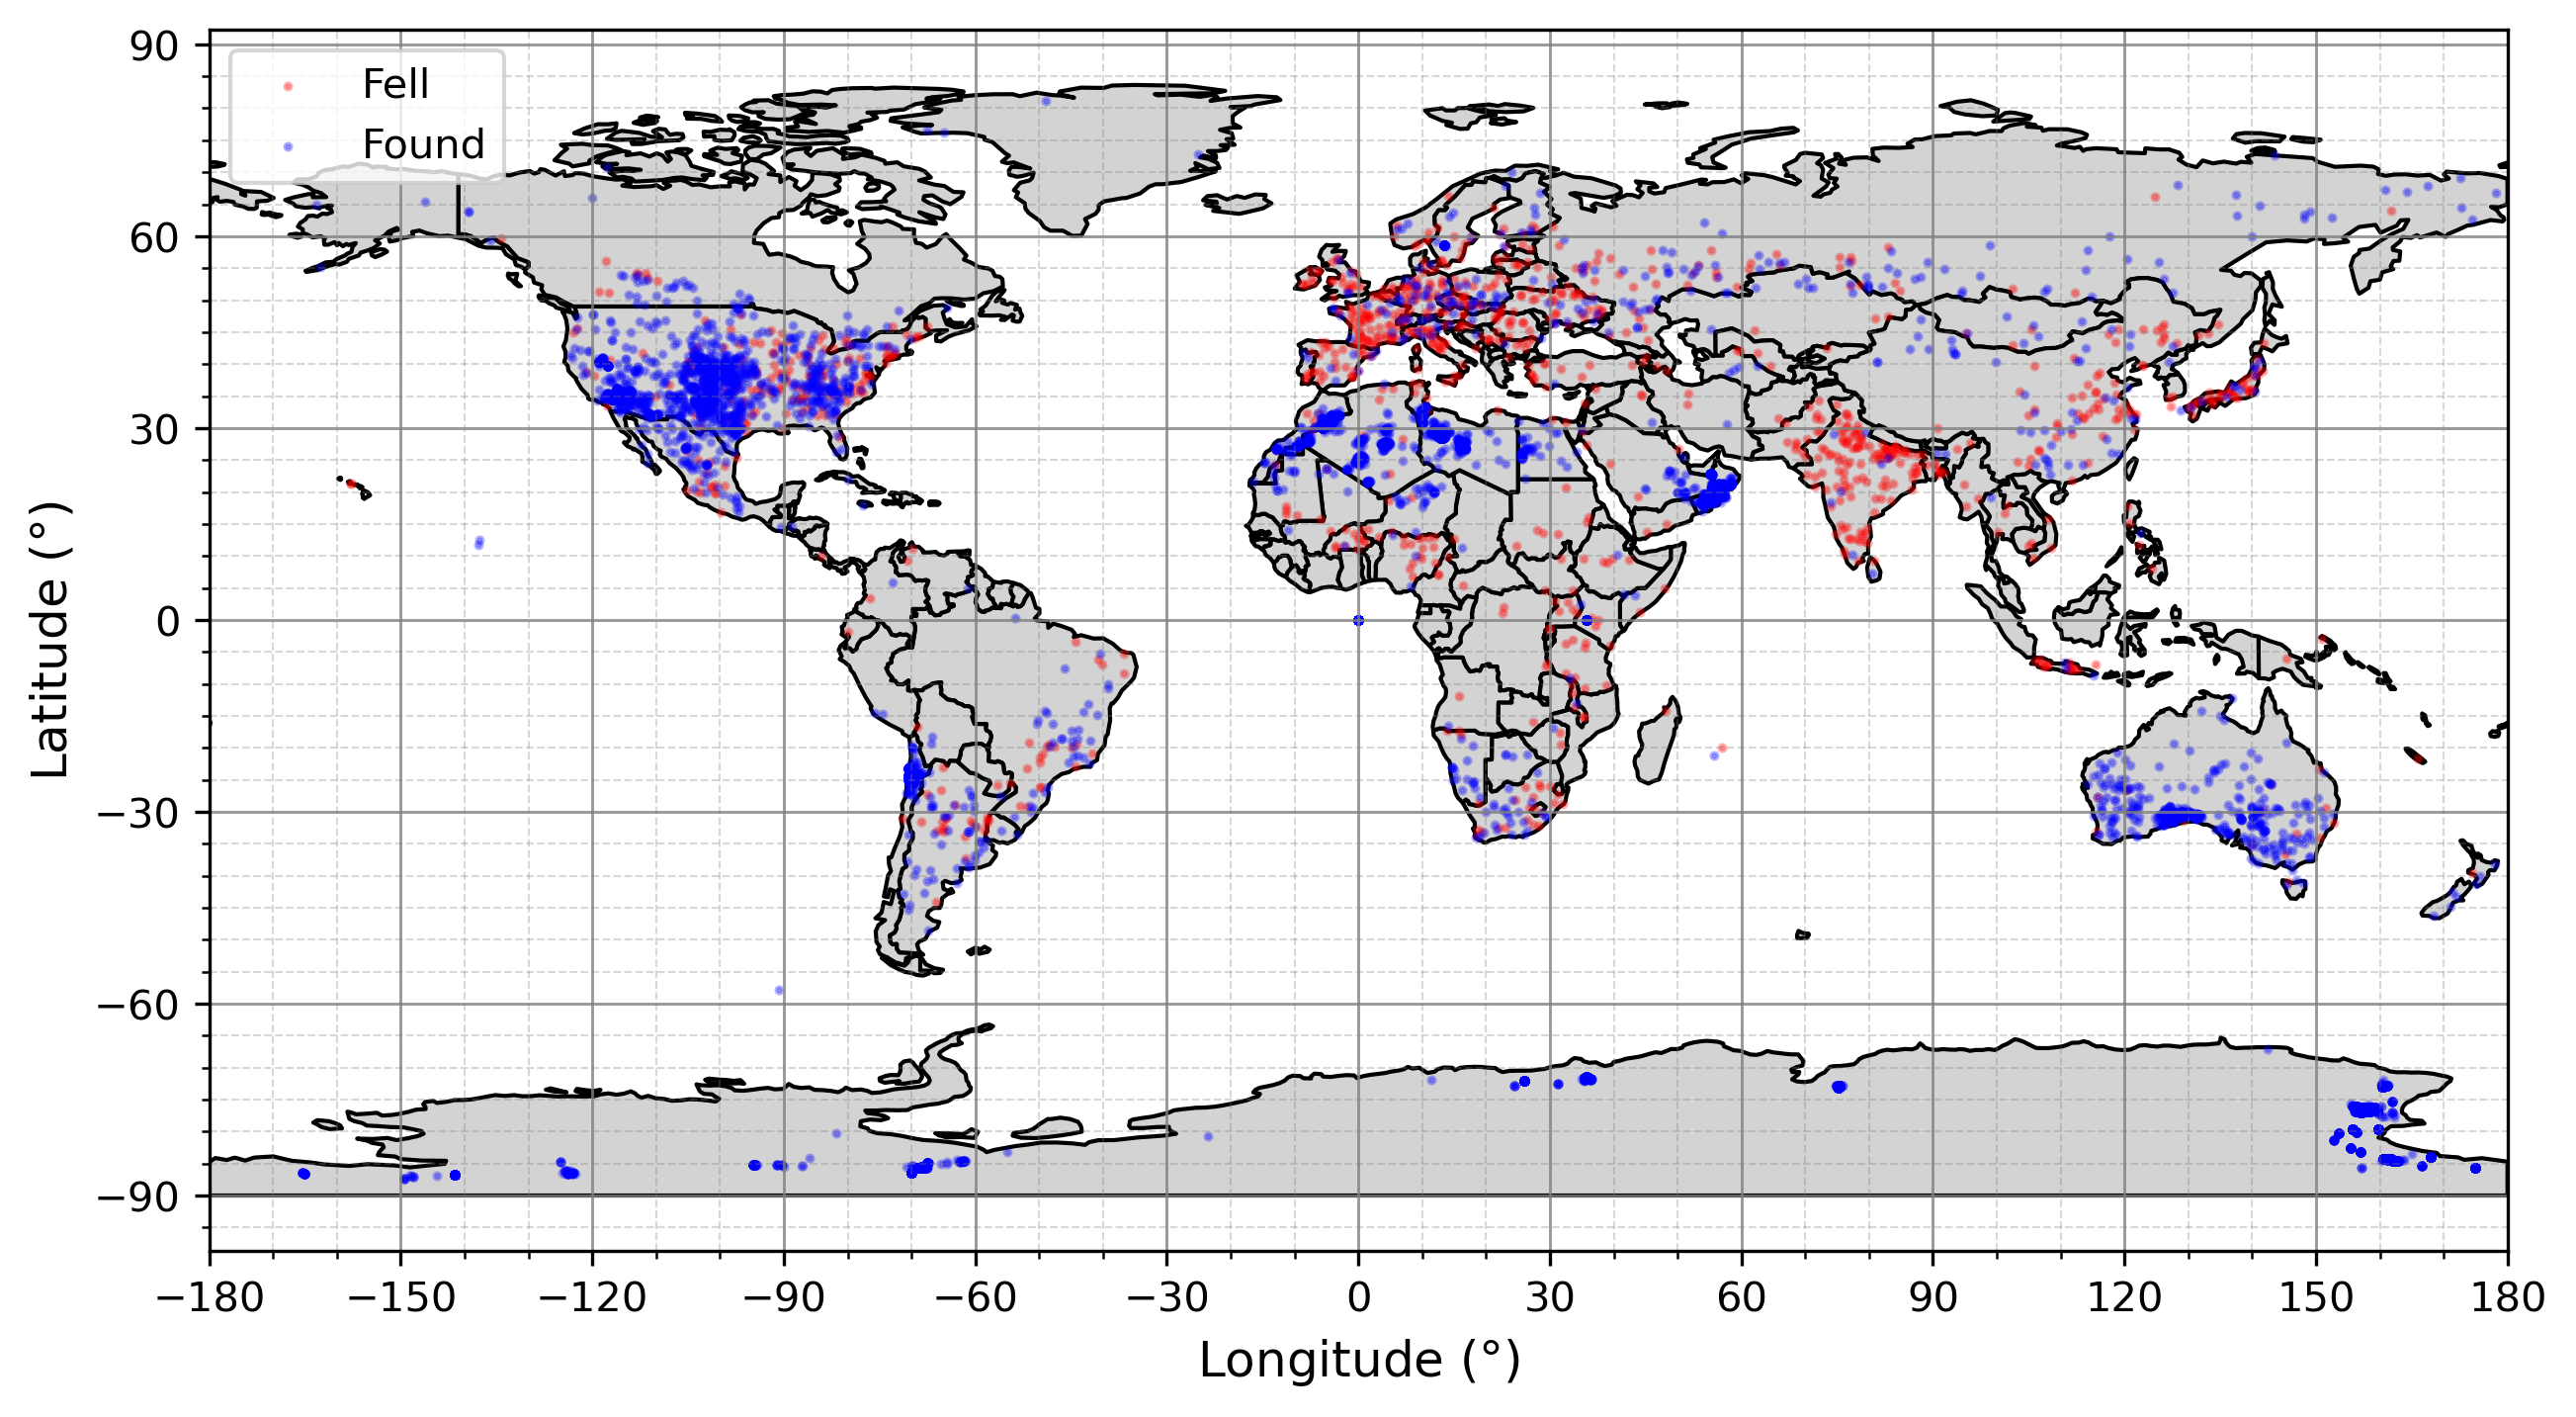

In [146]:
#Separate into fell and found

fell_df= clean_meteor_df[clean_meteor_df['fall'] == "Fell"]
found_df= clean_meteor_df[clean_meteor_df['fall'] == "Found"]



# Convert points to GeoDataFrame
fell = gpd.GeoDataFrame(
    fell_df,
    geometry=gpd.points_from_xy(fell_df['reclong'], fell_df['reclat']),
    crs="EPSG:4326"   # WGS84 lat/lon
)
found = gpd.GeoDataFrame(
    found_df,
    geometry=gpd.points_from_xy(found_df['reclong'], found_df['reclat']),
    crs="EPSG:4326"   # WGS84 lat/lon
)

# Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
world.plot(ax=ax, color='lightgray', edgecolor='black')
fell.plot(ax=ax, color='red', markersize=2, alpha=0.3, label="Fell")
found.plot(ax=ax, color='blue', markersize=2, alpha=0.3, label="Found")


#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-180, 181, 30))  # every 30° longitude
ax.set_yticks(range(-90, 91, 30))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(10))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(5))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlim(-180,180)
plt.legend()
plt.show()

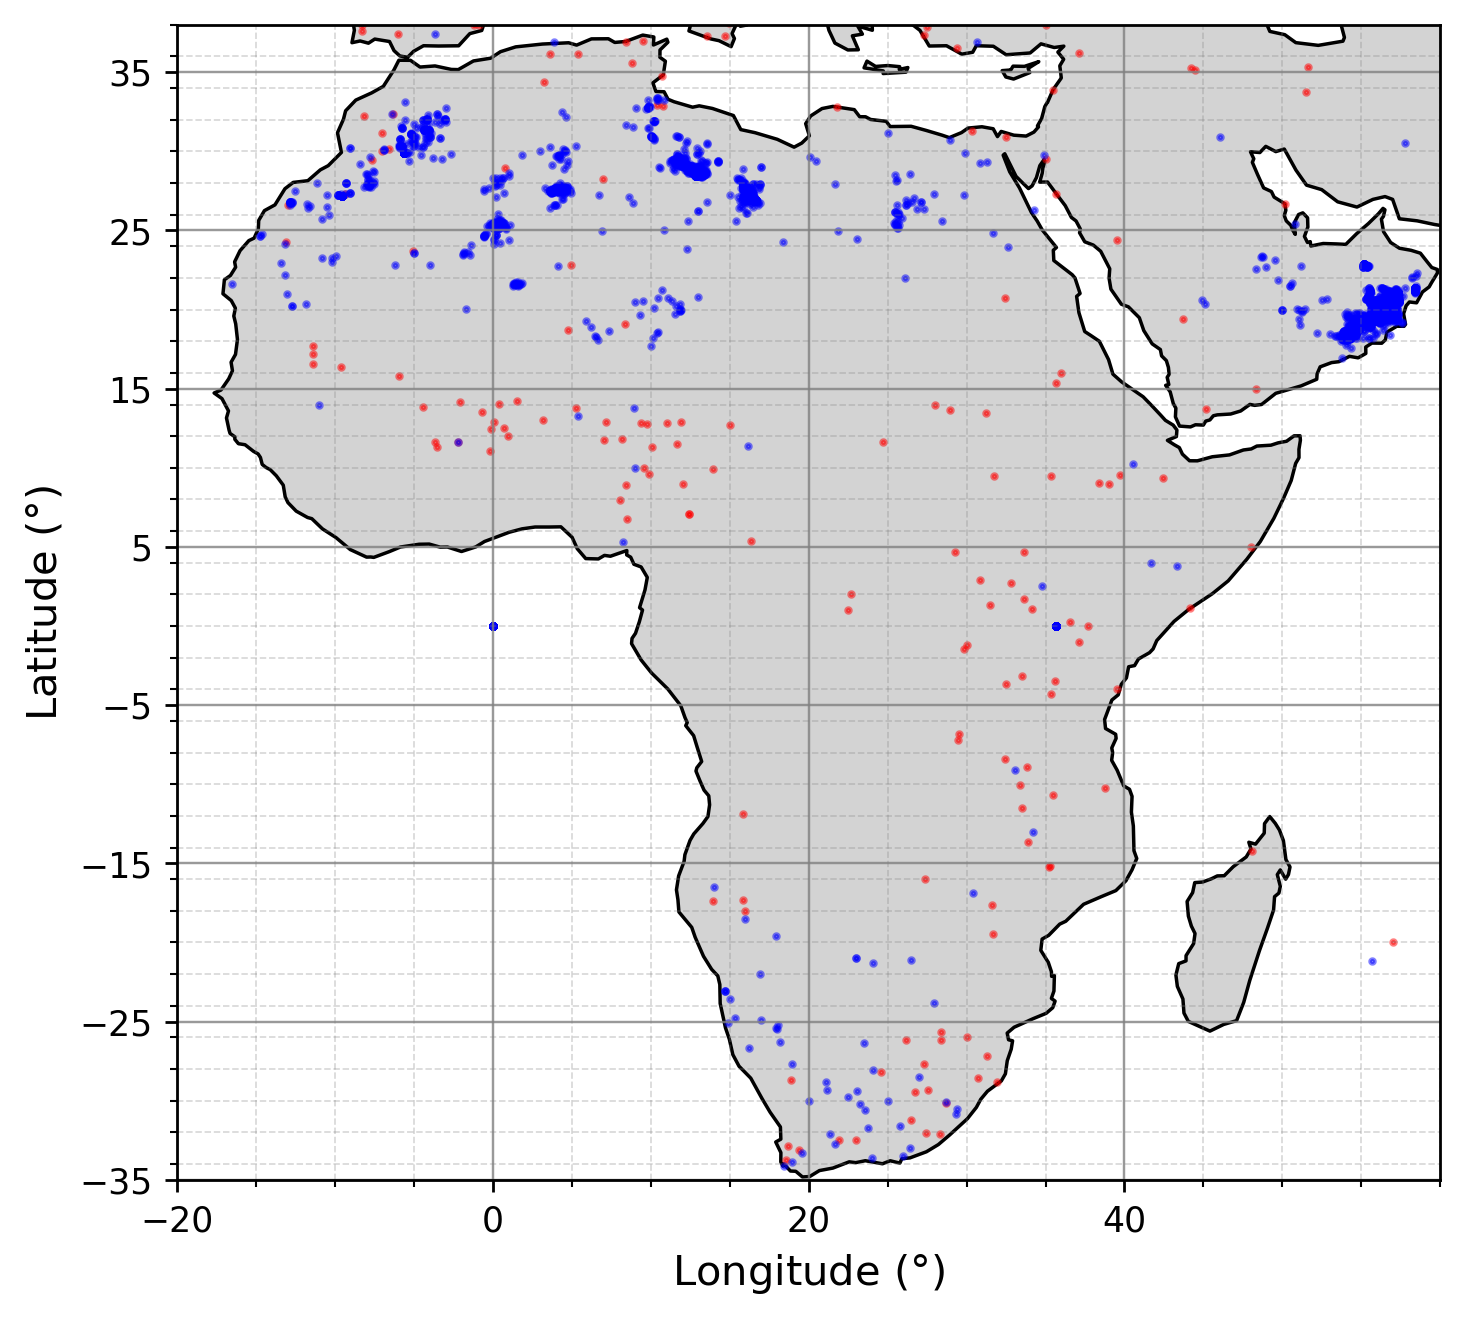

In [167]:
#Zoom into Africa

fig, ax = plt.subplots(figsize=(10, 6), dpi=250)
world.plot(ax=ax, color='lightgray', edgecolor='black')
fell.plot(ax=ax, color='red', markersize=2, alpha=0.5, label="Fell")
found.plot(ax=ax, color='blue', markersize=2, alpha=0.5, label="Found")

#Plot Labels
plt.xlabel(r"Longitude ($\degree$)", fontsize=12)
plt.ylabel(r"Latitude ($\degree$)", fontsize=12)

#Plot Limits for North America
plt.xlim(-20, 60)
plt.ylim(-35, 38)

#Plot Aesthetics
# Major ticks
ax.set_xticks(range(-20, 60, 20))  # every 30° longitude
ax.set_yticks(range(-35, 38, 10))    # every 30° latitude

# Minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(5))  # every 10° longitude
ax.yaxis.set_minor_locator(MultipleLocator(2))   # every 5° latitude

# Gridlines
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.8)
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.show()

In [261]:
clean_meteor_df

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[38400 rows x 10 columns]

In [167]:
# Meteorites found per country
from shapely.geometry import Point
world = gpd.read_file("../raw/ne_110m_admin_0_countries.zip")

clean_meteor_df = clean_meteor_df.rename(columns={"name": "city_name"})

#Convert to Geometery 
geometry = [Point(xy) for xy in zip(clean_meteor_df['reclong'], clean_meteor_df['reclat'])]

gdf = gpd.GeoDataFrame(clean_meteor_df, geometry=geometry, crs="EPSG:4326")

print("world columns:", world.columns)
#Match each point to contry borders it fits in
meteorites_with_country = gpd.sjoin(
    gdf,
    world[['NAME', 'geometry']],   # only keep relevant columns
    how="left",
    predicate="within"
).rename(columns={"NAME": "country"})

#counts per country
counts = meteorites_with_country.groupby("country").size().sort_values(ascending=False)


world columns: Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


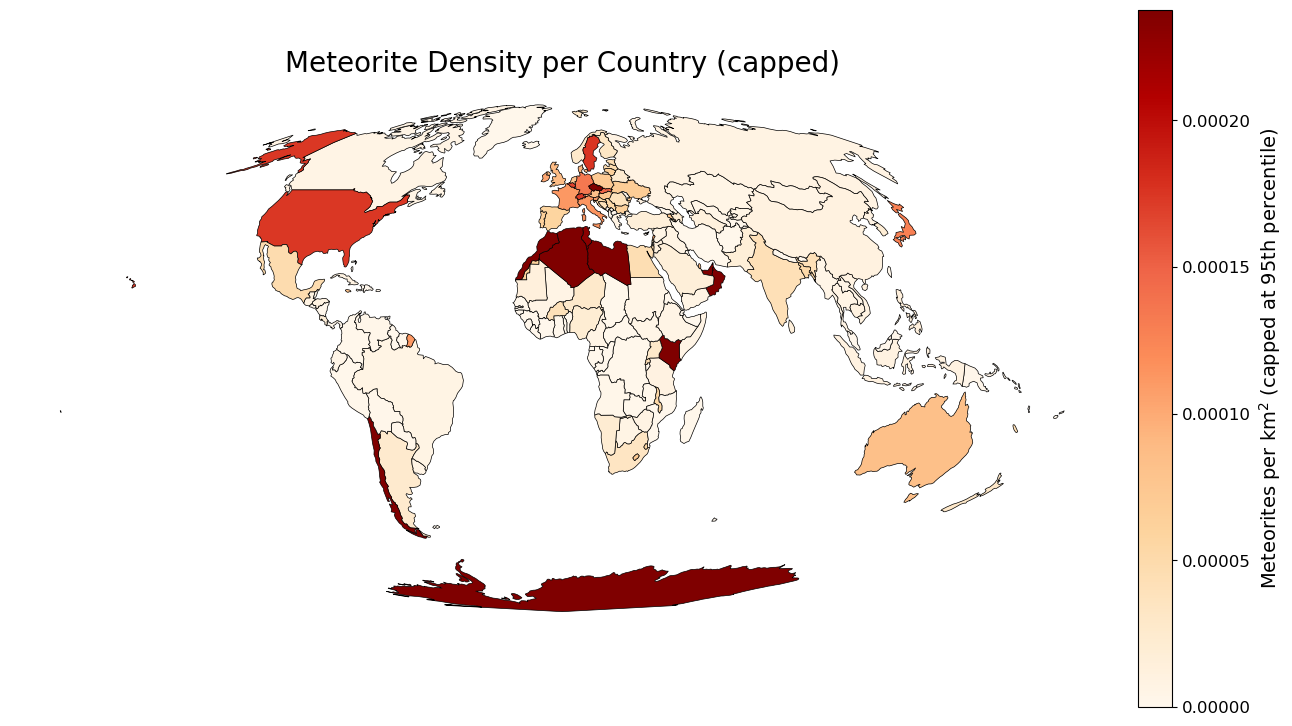

In [168]:
# Plot the choropleth map

# -----------------------
# 4. Count meteorites per country and per area
# -----------------------
counts = meteorites_with_country.groupby('country').size()
counts.name = 'meteorite_count'   # <-- give the Series a name

# Merge counts back to the world GeoDataFrame
world_counts = world.merge(counts, left_on='NAME', right_index=True, how='left')

# Fill missing counts with 0
world_counts['meteorite_count'] = world_counts['meteorite_count'].fillna(0)

# Project to an equal-area projection 
world_counts_proj = world_counts.to_crs("+proj=moll")  # Mollweide projection

# Country area in km²
world_counts_proj['area_sqr_km'] = world_counts_proj['geometry'].area / 1e6

world_counts_proj['meteorites_per_sqr_km'] = world_counts_proj['meteorite_count'] / world_counts_proj['area_sqr_km']


max_val = np.percentile(world_counts_proj['meteorites_per_sqr_km'], 95)
world_counts_proj['density_capped'] = world_counts_proj['meteorites_per_sqr_km'].clip(upper=max_val)

# Plot using the capped values
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_counts_proj.plot(
    column='density_capped',
    ax=ax,
    cmap='OrRd',
    edgecolor='black',
    linewidth=0.5,
    legend=False,
)
# -----------------------------
# Customize colorbar
# -----------------------------
# Create ScalarMappable for colorbar
sm = plt.cm.ScalarMappable(
    cmap='OrRd', 
    norm=plt.Normalize(vmin=world_counts_proj['density_capped'].min(),
                       vmax=world_counts_proj['density_capped'].max())
)
sm._A = []  # dummy array

# Add colorbar
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)  # fraction controls size
cbar.set_label(r"Meteorites per km$^{2}$ (capped at 95th percentile)", fontsize=14)  # label font size
cbar.ax.tick_params(labelsize=12)  # tick labels font size 



ax.set_title("Meteorite Density per Country (capped)", fontsize=20)
ax.set_axis_off()
plt.show()


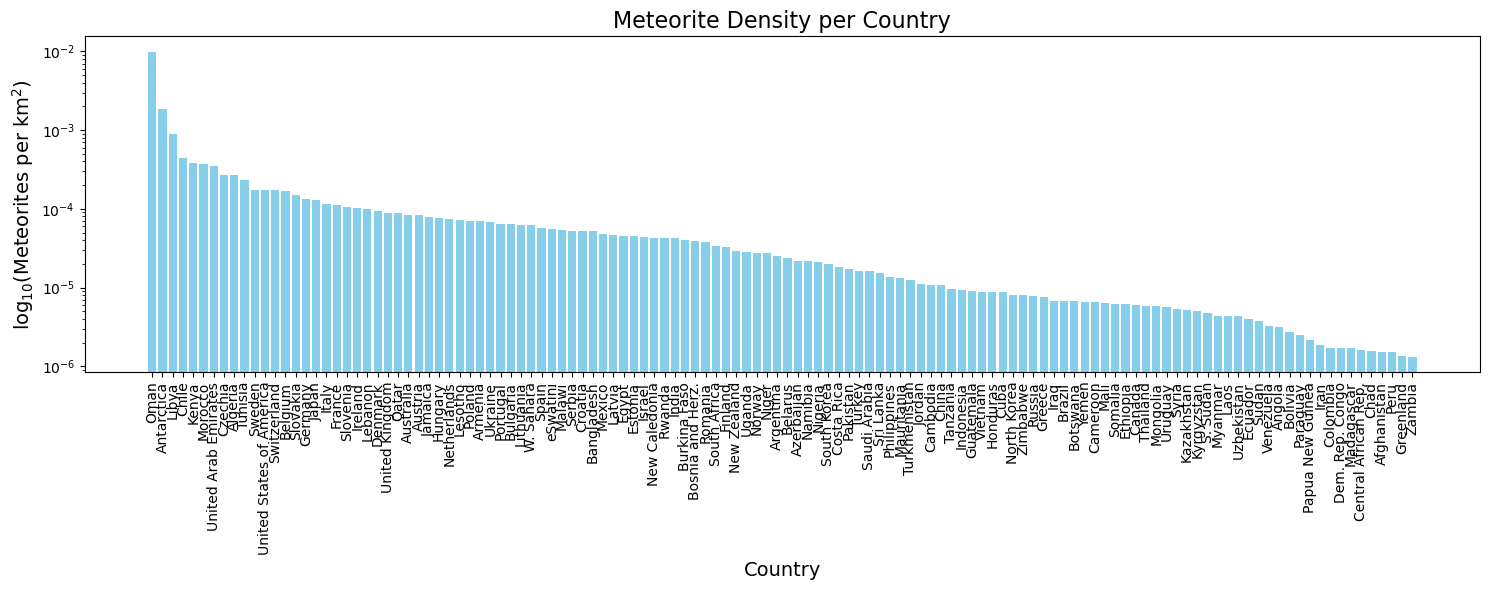

In [ ]:
density_df = world_counts_proj[['NAME', 'meteorites_per_sqr_km']].copy()

#sort by descending 
density_df = density_df.sort_values(by='meteorites_per_sqr_km', ascending=False)
density_df = density_df[density_df['meteorites_per_sqr_km'] != 0]

#plot
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(density_df['NAME'], density_df['meteorites_per_sqr_km'], color='skyblue')
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel(r'Meteorites per km$^2$ (log scale)', fontsize=14)
ax.set_title('Meteorite Density per Country', fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Now Analyzing GDP 

In [194]:
gdp_df=pd.read_csv('../raw/GDP_per_country.csv', skiprows=4)
print(gdp_df)
gdp_df = gdp_df[['Country Name', '2024']].rename(
    columns={'Country Name': 'NAME', '2024': 'gdp_per_capita'}
)
merge = world_counts_proj.merge(gdp_df, on='NAME', how='left')
merged_clean = merge.dropna(subset=['meteorites_per_sqr_km', 'gdp_per_capita'])


                    Country Name Country Code                Indicator Name  \
0                          Aruba          ABW  GDP per capita (current US$)   
1    Africa Eastern and Southern          AFE  GDP per capita (current US$)   
2                    Afghanistan          AFG  GDP per capita (current US$)   
3     Africa Western and Central          AFW  GDP per capita (current US$)   
4                         Angola          AGO  GDP per capita (current US$)   
..                           ...          ...                           ...   
261                       Kosovo          XKX  GDP per capita (current US$)   
262                  Yemen, Rep.          YEM  GDP per capita (current US$)   
263                 South Africa          ZAF  GDP per capita (current US$)   
264                       Zambia          ZMB  GDP per capita (current US$)   
265                     Zimbabwe          ZWE  GDP per capita (current US$)   

     Indicator Code        1960        1961        

In [195]:
import statsmodels.api as sm
# Use your cleaned dataset from the pipeline
df = merged_clean.copy()

df = df[
    (df['meteorites_per_sqr_km'] > 0) &
    (df['gdp_per_capita'] > 0)
].copy()
# Log-transform variables
df['log_density'] = np.log10(df['meteorites_per_sqr_km'])
df['log_gdp'] = np.log10(df['gdp_per_capita'])

# Define X and Y
X = sm.add_constant(df['log_gdp'])   # adds intercept
Y = df['log_density']

# Fit regression model
model = sm.OLS(Y, X).fit()

print(model.summary())
p_value = model.pvalues['log_gdp']

print("Actual p-value:", p_value)

                            OLS Regression Results                            
Dep. Variable:            log_density   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     21.41
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           1.18e-05
Time:                        21:24:21   Log-Likelihood:                -91.359
No. Observations:                  96   AIC:                             186.7
Df Residuals:                      94   BIC:                             191.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4698      0.420    -15.423      0.0

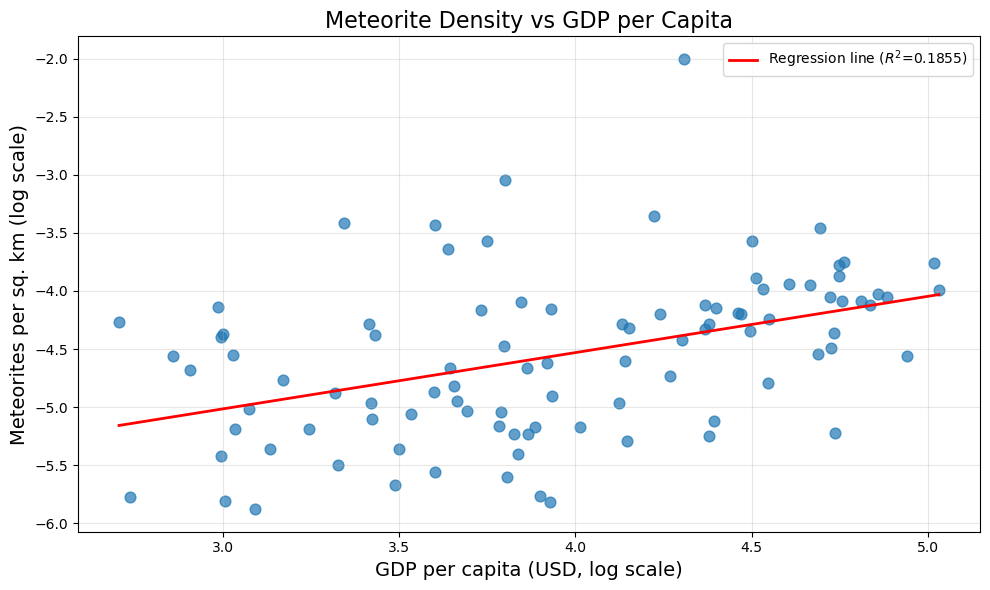

p-value: 1.1838875145604656e-05


In [ ]:
plt.figure(figsize=(10, 6))
xvals = np.linspace(df['log_gdp'].min(), df['log_gdp'].max(), 200)
yvals = model.params['const'] + model.params['log_gdp'] * xvals
plt.plot(xvals, yvals, linewidth=2, label=r"Regression line ($R^2$=" + f"{model.rsquared:.4f})", color='red')

plt.scatter(
    np.log10(merged_clean['gdp_per_capita']),
    np.log10(merged_clean['meteorites_per_sqr_km']),
    s=60, alpha=0.7
)

plt.xlabel("GDP per capita (USD, log scale)", fontsize=14)
plt.ylabel(r"Meteorites per km$^2$ (log scale)", fontsize=14)
plt.title("Meteorite Density vs GDP per Capita", fontsize=16)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.legend()
plt.show()

print("p-value:", p_value)